# Segmentação de Clientes - Banco da Índia

In [2]:
from IPython import display

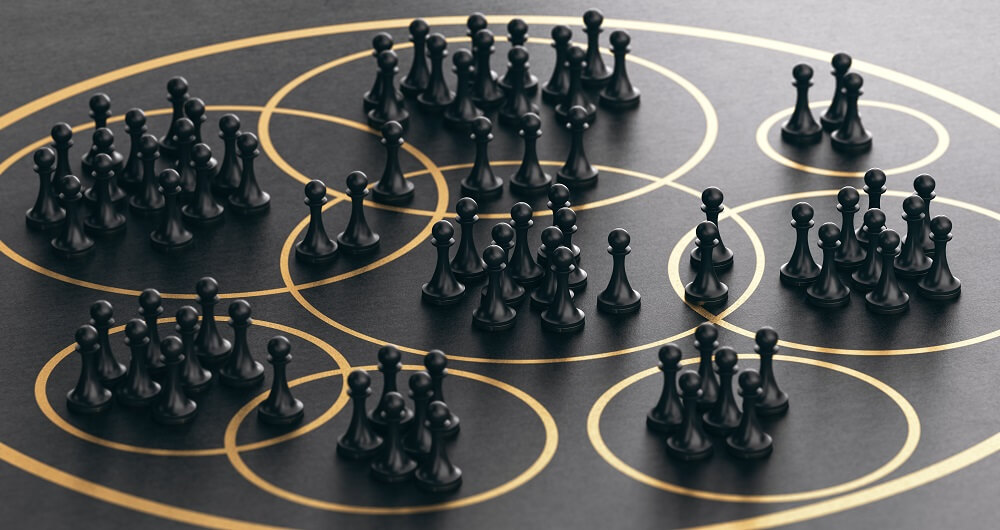

In [3]:
display.Image('../imagens/customer-segmentation-bank.jpg')

À medida que aceleramos para um mundo digital, a compreensão dos padrões bancários online dos clientes e a sua segmentação com base nas suas preferências para prever e prestar-lhes serviços bancários tornou-se uma prioridade máxima para os bancos em todo o mundo.

A maioria dos bancos tem uma grande base de clientes – com características diferentes em termos de idade, renda, valores, estilo de vida e muito mais. A segmentação de clientes é o processo de divisão de um conjunto de dados de clientes em grupos específicos com base em características compartilhadas.

De acordo com um relatório da Ernst & Young, “Uma compreensão mais granular dos consumidores já não é um item interessante, mas um imperativo estratégico e competitivo para os prestadores bancários. A compreensão do cliente deve ser uma parte viva do dia a dia dos negócios, com insights que sustentam toda a gama de operações bancárias.



# Problema de Negócio

Os clientes bancários possuem perfis variados e demandam serviços personalizados que atendam às suas necessidades específicas. Diante desse cenário, os bancos precisam romper com abordagens tradicionais e se adaptar às novas preferências e comportamentos de seus clientes.

Embora cada cliente tenha características únicas, alguns atributos podem ser compartilhados entre diferentes perfis, permitindo que os bancos compreendam melhor os padrões de comportamento e antecipem demandas e necessidades de maneira mais eficiente.

Para explorar esse potencial, é fundamental que os bancos utilizem a segmentação de clientes com o apoio de inteligência artificial e aprendizado de máquina. Essas técnicas ajudam a personalizar a experiência dos clientes, além de possibilitar o desenvolvimento de produtos que se ajustem rapidamente aos hábitos, interesses e exigências do mercado.

# Sobre a Base de Dados

Este conjunto de dados consiste em mais de 1 milhão de transações feitas por mais de 800 mil clientes para um banco na Índia. Os dados contêm informações como idade do cliente (DOB), localização, sexo, saldo da conta no momento da transação, detalhes da transação, valor da transação, etc.

### Dicionário dos Dados
* TransactionID = ID de Transação
* CustomerID = ID de cliente exclusivo
* CustomerDOB = Data de Nascimento
* CustGender = Gênero
* CustLocation = Localização
* CustAccountBalance = Saldo da Conta
* TransactionDate = Data da Transação
* TransactionTime = Hora da Transação
* TransactionAmount (INR) = Valor da Transação em INR - rupia indiana

# 1.0 Análise Exploratória Inicial e Transformação dos Dados


### 1.1 Importação das Bibliotecas

In [4]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


from datetime import datetime, date

import warnings
warnings.filterwarnings('ignore')

### 1.2 Carregamento do DataSet

In [5]:
df = pd.read_csv('../data/bank_transactions.csv')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


### 1.3 Renomeando as Variáveis

In [29]:
df2 = df.copy()

In [30]:
df2.rename(columns = {'TransactionID':'id_transacao', 
                      'CustomerID':'id_cliente', 
                      'CustomerDOB':'data_de_nascimento', 
                      'CustGender':'genero',
                      'CustLocation':'localizacao', 
                      'CustAccountBalance':'saldo_da_conta', 
                      'TransactionDate':'data_da_transacao',
                      'TransactionTime':'hora_da_transacao', 
                      'TransactionAmount (INR)':'valor_da_transacao_INR'}, inplace = True)

df2.head()

,id_transacao,id_cliente,data_de_nascimento,genero,localizacao,saldo_da_conta,data_da_transacao,hora_da_transacao,valor_da_transacao_INR
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


### 1.4 Informações do DataSet


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id_transacao            1048567 non-null  object 
 1   id_cliente              1048567 non-null  object 
 2   data_de_nascimento      1045170 non-null  object 
 3   genero                  1047467 non-null  object 
 4   localizacao             1048416 non-null  object 
 5   saldo_da_conta          1046198 non-null  float64
 6   data_da_transacao       1048567 non-null  object 
 7   hora_da_transacao       1048567 non-null  int64  
 8   valor_da_transacao_INR  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


* Nesse primeiro momento, podemos ver que existem varíaveis do tipo categórica, e variáveis do tipo numérica:
    * categórica: id_transacao, id_cliente, genero, localizacao.
    * numérica: data_de_nascimento, saldo_da_conta, data_da_transacao, hora_da_transacao e valor_da_transacao_INR.
* E há variáveis com valores ausentes, no caso são as variáveis:
    * data_de_nascimento, genero, localizacao e saldo_da_conta.

In [32]:
df2.shape

(1048567, 9)

* O Dataset possui 1.048.567 linhas, e 9 colunas nesse primeiro momento.

### 1.5 Transformação do tipo das variáveis

Analisando o Dataset, podemos observar que data_de_nascimento, e data_de_transacao estão no formato do tipo object, seria ideal fazer uma transformação para o tipo de dado correto, nesse caso, o tipo datetime, afinal são datas.


In [35]:
df2['data_de_nascimento'] = pd.to_datetime(df2['data_de_nascimento'], errors='coerce', format = 'mixed')
df2['data_da_transacao'] = pd.to_datetime(df2['data_da_transacao'], errors='coerce', format = 'mixed')

In [ ]:
df2['data_de_nascimento'] = df2['data_de_nascimento'].dt.year

In [90]:
df2.dtypes


id_transacao                      object
id_cliente                        object
data_de_nascimento               float64
genero                            object
localizacao                       object
saldo_da_conta                   float64
data_da_transacao         datetime64[ns]
hora_da_transacao                  int64
valor_da_transacao_INR           float64
dtype: object

### 1.6 Check NA
Verificação das colunas e quantidade de linhas que possuem valores NaN. Esses valores faltantes seram preenchidos com base na lógica do negócio.

In [91]:
valores_ausentes = df2.isna().sum().sort_values(ascending=False)
valores_ausentes

data_de_nascimento        3397
saldo_da_conta            2369
genero                    1100
localizacao                151
id_transacao                 0
id_cliente                   0
data_da_transacao            0
hora_da_transacao            0
valor_da_transacao_INR       0
dtype: int64

In [92]:
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / df2.shape[0]
print(f'{round(valores_ausentes_percent * 100, 2)} %')

data_de_nascimento    0.32
saldo_da_conta        0.23
genero                0.10
localizacao           0.01
dtype: float64 %


* Como já mencionado antes, as variáveis data_de_nascimento, genero, localizacao e saldo_da_conta possuem valores ausentes consideráveis.

### 1.7 Tratando NA utilizando a detecção de Outliers


Aqui vamos substituir os valores faltantes de forma que todas presunções assumidass são feitas com o objetivo de chegar o mais proximo possivel da realidade do negocio.

##### 1.7.1 Variavel data_de_nascimento

Aqui vamos substituir os valores faltantes pela mediana, porem antes vamos eleminar alguns dados que não fazem sentido.

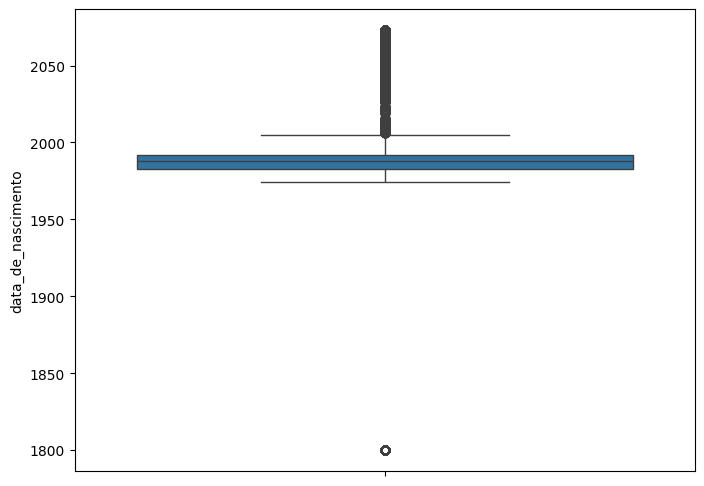

In [93]:
# Criando o boxplot com Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(y=df2['data_de_nascimento'])

# Exibindo o gráfico
plt.show()

* Observamos que a variavel data_de_nascimento possuem valores que não fazem sentido, por exemplo não faz sentido um cliente ter nascido antes de 1900 ou depois de 2016. Então vamos eliminar esses casos.

In [95]:
df2_filtered = df2[(df2['data_de_nascimento'] >= 1900) & (df2['data_de_nascimento'] <= 2016)]


print("Nascido antes de 1900:", df2[df2['data_de_nascimento'] < 1900 ].shape[0])
print("Nascido depois de 2016:", df2[df2['data_de_nascimento'] > 2016 ].shape[0])
print("Nascidos entre 1900 e 2016:", df2_filtered.shape[0])


Nascido antes de 1900: 57339
Nascido depois de 2016: 94273
Nascidos entre 1900 e 2016: 893558


In [96]:
# Identificação de outliers através do método do IQR (Interquatile Range)
Q1 = df2_filtered['data_de_nascimento'].quantile(0.25)
Q3 = df2_filtered['data_de_nascimento'].quantile(0.75)
IQR = Q3 - Q1

# Definir outliers como aqueles valores que estão fora do intervalo [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
outliers_numericos_com_NA_maior_que_5_por_cento = ((df2_filtered['data_de_nascimento'] < (Q1 - 1.5 * IQR)) | (df2_filtered['data_de_nascimento'] > (Q3 + 1.5 * IQR)))

# Total de outliers
total_outliers = outliers_numericos_com_NA_maior_que_5_por_cento.sum()
print("Total de outliers:", total_outliers)

Total de outliers: 540


In [103]:
median_year = df2_filtered['data_de_nascimento'].median()

df2_filtered['data_de_nascimento'] = df2_filtered['data_de_nascimento'].fillna(median_year)


In [142]:
df2_filtered['data_de_nascimento'] = df2_filtered['data_de_nascimento'].astype(int)


##### 1.7.2 Variavel saldo_da_conta

Aqui vamos substituir os valores faltantes pela mediana.

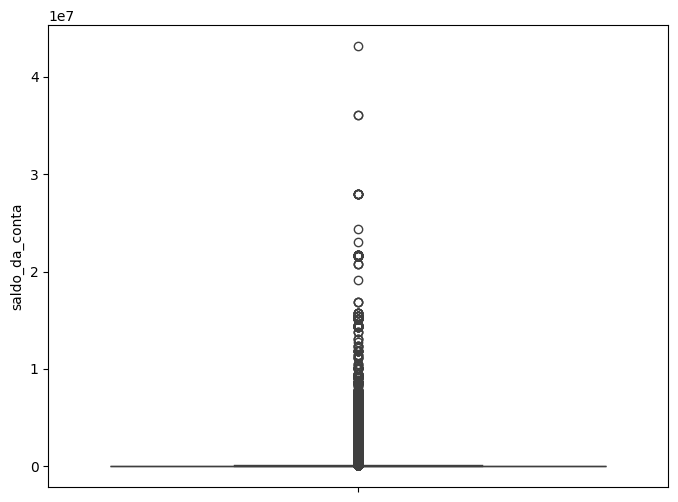

In [109]:
# Criando o boxplot com Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(y=df2_filtered['saldo_da_conta'])

# Exibindo o gráfico
plt.show()

In [119]:
# Identificação de outliers através do método do IQR (Interquatile Range)
Q1 = df2_filtered['saldo_da_conta'].quantile(0.25)
Q3 = df2_filtered['saldo_da_conta'].quantile(0.75)
IQR = Q3 - Q1

# Definir outliers como aqueles valores que estão fora do intervalo [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
outliers_numericos_com_NA_maior_que_5_por_cento = ((df2_filtered['saldo_da_conta'] < (Q1 - 1.5 * IQR)) | (df2_filtered['saldo_da_conta'] > (Q3 + 1.5 * IQR)))

# Total de outliers
total_outliers = outliers_numericos_com_NA_maior_que_5_por_cento.sum()
print("Total de outliers:", total_outliers)

Total de outliers: 114251


In [124]:
median_year = df2_filtered['saldo_da_conta'].median()

df2_filtered['saldo_da_conta'] = df2_filtered['saldo_da_conta'].fillna(median_year)


##### 1.7.3 Variavel genero e localizacao

Aqui vamos substituir os valores faltantes pelo valor que mais de repete.

In [129]:
df2_filtered['genero'].value_counts()

genero
M    645892
F    247653
Name: count, dtype: int64

In [130]:
df2_filtered['localizacao'].value_counts()

localizacao
MUMBAI             88122
BANGALORE          71607
NEW DELHI          67157
GURGAON            63665
DELHI              61406
                   ...  
NAMSAI                 1
SHIRSUFAL              1
CHORAO                 1
PADA NO 4 THANE        1
DT HOSUR               1
Name: count, Length: 7597, dtype: int64

In [131]:
vars_cat_ate_10_por_cento_de_missing = ['genero', 'localizacao']


for i in df2_filtered[vars_cat_ate_10_por_cento_de_missing]:
    df2_filtered[i].fillna(df2_filtered[i].value_counts().index[0], inplace=True)

In [133]:
valores_ausentes = df2_filtered.isna().sum().sort_values(ascending=False)
valores_ausentes

id_transacao              0
id_cliente                0
data_de_nascimento        0
genero                    0
localizacao               0
saldo_da_conta            0
data_da_transacao         0
hora_da_transacao         0
valor_da_transacao_INR    0
dtype: int64

### 1.8 Dados Duplicados


In [134]:
df2_filtered.duplicated().sum()


np.int64(0)

* Podemos ver que a base de dados não possui valores duplicados.


In [143]:
df2_filtered.head()

,id_transacao,id_cliente,data_de_nascimento,genero,localizacao,saldo_da_conta,data_da_transacao,hora_da_transacao,valor_da_transacao_INR
0,T1,C5841053,1994,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
2,T3,C4417068,1996,F,MUMBAI,17874.44,2016-02-08,142712,459.0
4,T5,C9031234,1988,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5
6,T7,C7126560,1992,F,MUMBAI,973.46,2016-02-08,173806,566.0
7,T8,C1220223,1982,M,MUMBAI,95075.54,2016-02-08,170537,148.0


### 1.9 Descriptive Statistics

In [144]:
# divisão das variáveis numéricas e categóricas

num_vars = df2_filtered.select_dtypes(include=np.number)
cat_vars = df2_filtered.select_dtypes(exclude=np.number)

In [147]:
# Variáveis Numéricas

num_vars.describe()

,data_de_nascimento,saldo_da_conta,hora_da_transacao,valor_da_transacao_INR
count,893558.000000,8.935580e+05,893558.000000,8.935580e+05
mean,1987.128427,7.921628e+04,157616.885121,1.286010e+03
std,5.342450,3.757294e+05,51673.735356,5.442732e+03
min,1974.000000,0.000000e+00,0.000000,0.000000e+00
25%,1984.000000,4.253070e+03,124317.000000,1.470000e+02
50%,1988.000000,1.465457e+04,164940.000000,3.990000e+02
75%,1991.000000,4.678678e+04,200438.000000,1.008630e+03
max,2016.000000,4.316556e+07,235959.000000,1.560035e+06


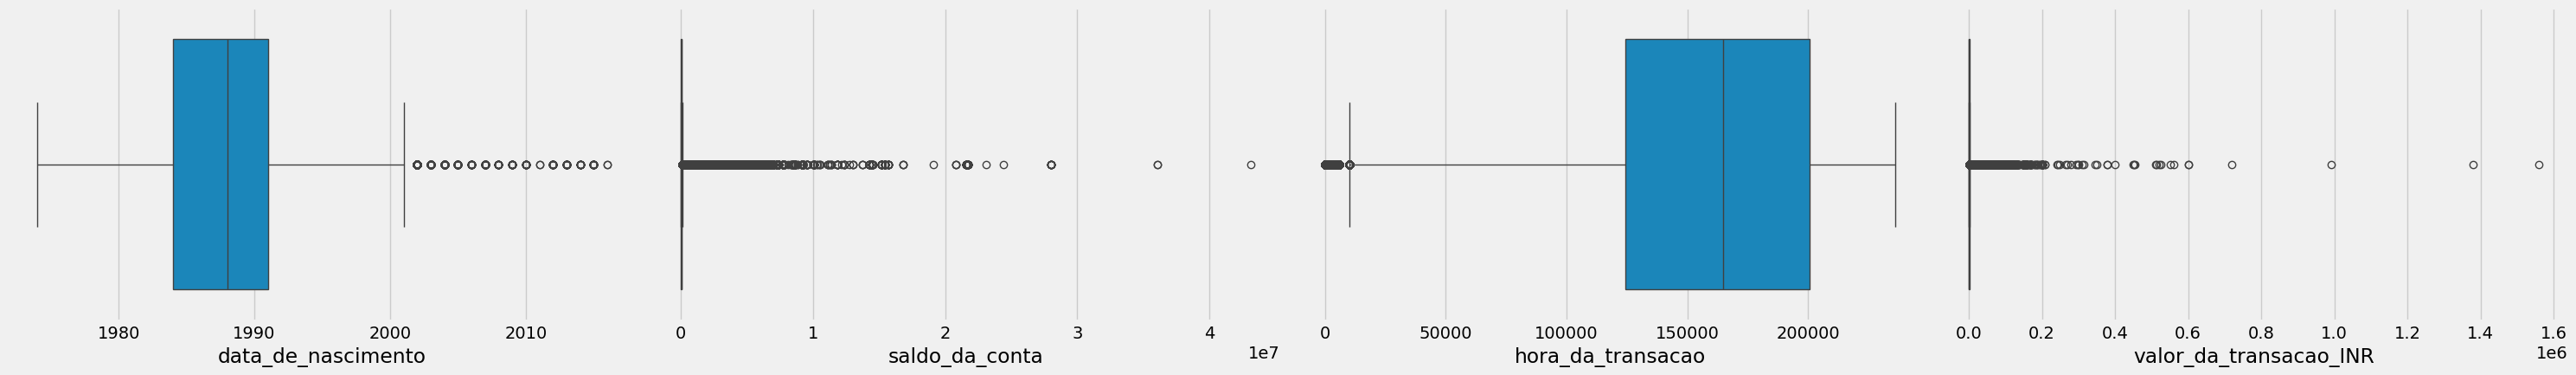

In [149]:
# Variáveis Numéricas

plt.style.use("fivethirtyeight")
plt.figure(figsize=(30,30))
for index,column in enumerate(num_vars):
    plt.subplot(7,4,index+1)
    sns.boxplot(data=num_vars,x=column)
    
plt.tight_layout(pad = 1.0)

In [150]:
# Variáveis Categóricas

cat_vars.describe(include='object')

,id_transacao,id_cliente,genero,localizacao
count,893558,893558,893558,893558
unique,893558,771697,2,7597
top,T1048567,C6222360,M,MUMBAI
freq,1,6,645905,88233


# 2.0 Feature Engineering 

Nessa etapa vamos levantar algumas hipoteses e com isso criar features a partir das variaveis já existentes.



In [169]:
df3 = df2_filtered.copy()


In [170]:
df3.head()

,id_transacao,id_cliente,data_de_nascimento,genero,localizacao,saldo_da_conta,data_da_transacao,hora_da_transacao,valor_da_transacao_INR
0,T1,C5841053,1994,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
2,T3,C4417068,1996,F,MUMBAI,17874.44,2016-02-08,142712,459.0
4,T5,C9031234,1988,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5
6,T7,C7126560,1992,F,MUMBAI,973.46,2016-02-08,173806,566.0
7,T8,C1220223,1982,M,MUMBAI,95075.54,2016-02-08,170537,148.0


* Observei uma possível transformação na variável hora_da_transacao. As informações estão um pouco confusas, pensando nisso, tive a idéia de criar uma nova variável, pegando os valores da hora de transação para criar o período do dia de transação:
    * manhã
    * tarde
    * noite
    * madrugada
    * indefinido
    
* Com isso, acredito que seria mais fácil a continuação da análise exploratória.

In [171]:
def periodo_do_dia(hora):
    if hora >= 60000 and hora < 120000:
        return 'manha'
    elif hora >= 120000 and hora < 180000:
        return 'tarde'
    elif hora >= 180000:
        return 'noite'
    elif hora >= 0 and hora < 60000:
        return 'madrugada'
    else:
        return 'indefinido'

df3['periodo_do_dia_da_transacao'] = df3.hora_da_transacao.apply(periodo_do_dia)

In [172]:
df3.head()

,id_transacao,id_cliente,data_de_nascimento,genero,localizacao,saldo_da_conta,data_da_transacao,hora_da_transacao,valor_da_transacao_INR,periodo_do_dia_da_transacao
0,T1,C5841053,1994,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,tarde
2,T3,C4417068,1996,F,MUMBAI,17874.44,2016-02-08,142712,459.0,tarde
4,T5,C9031234,1988,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,noite
6,T7,C7126560,1992,F,MUMBAI,973.46,2016-02-08,173806,566.0,tarde
7,T8,C1220223,1982,M,MUMBAI,95075.54,2016-02-08,170537,148.0,tarde


In [173]:
df3['periodo_do_dia_da_transacao'].value_counts()

periodo_do_dia_da_transacao
noite        379172
tarde        326783
manha        146494
madrugada     41109
Name: count, dtype: int64

* Criando uma variável com a idade de cada cliente no ano de 2016, ano em que foi contabilizado esses registros, para melhorar a análise exploratória.

In [174]:
df3['idade_em_2016'] = df3['data_da_transacao'].dt.year - df3['data_de_nascimento']

In [175]:
df3['idade_em_2016'].value_counts()


idade_em_2016
26    72789
25    71288
27    69238
24    66708
28    63004
29    58726
23    53277
30    53035
31    46206
32    41187
22    36286
33    35798
34    32434
35    27434
36    25224
37    22174
21    20756
38    19658
39    16650
40    15109
20    12518
41    12332
42    10973
19     7163
18     1952
17      688
16      269
15      142
14      141
12       75
13       69
9        46
11       43
4        28
3        27
1        25
10       21
6        18
7        17
8        16
2        10
0         2
5         2
Name: count, dtype: int64

* Analisando as variáveis saldo_da_conta e valor_da_transacao_INR, vi que seria ideal criar uma variável chamada saldo_situacao, mostrando os clientes que possuem saldo_negativo, e os que possuem saldo_positivo.
* Agrupar esses registros dessa forma pode ser interessante para melhorar a análise e a clusterização.

In [176]:
condicoes_saldo = [
    df3['saldo_da_conta'] <= df3['valor_da_transacao_INR'],
    df3['saldo_da_conta'] >= df3['valor_da_transacao_INR']
]

categorias_saldo = ['saldo_negativo', 'saldo_positivo']

df3['saldo_situacao'] = np.select(condicoes_saldo, categorias_saldo, default='saldo_positivo')

In [177]:
df3['saldo_situacao'].value_counts()


saldo_situacao
saldo_positivo    803579
saldo_negativo     89979
Name: count, dtype: int64

* Nesse caso, optei em excluir essas variáveis por serem menos importantes para a análise.

In [178]:
df3.drop(columns = ['data_de_nascimento', 'hora_da_transacao'], inplace = True)


In [179]:
df3.head()

,id_transacao,id_cliente,genero,localizacao,saldo_da_conta,data_da_transacao,valor_da_transacao_INR,periodo_do_dia_da_transacao,idade_em_2016,saldo_situacao
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,25.0,tarde,22,saldo_positivo
2,T3,C4417068,F,MUMBAI,17874.44,2016-02-08,459.0,tarde,20,saldo_positivo
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-02-08,1762.5,noite,28,saldo_positivo
6,T7,C7126560,F,MUMBAI,973.46,2016-02-08,566.0,tarde,24,saldo_positivo
7,T8,C1220223,M,MUMBAI,95075.54,2016-02-08,148.0,tarde,34,saldo_positivo


* optei em criar duas colunas, dia e mês para melhorar os insights.

In [180]:
df3['dia_da_transacao'] = df3['data_da_transacao'].dt.day_name()
df3['mes_da_transacao'] = df3['data_da_transacao'].dt.month_name()

In [181]:
df3.head()


,id_transacao,id_cliente,genero,localizacao,saldo_da_conta,data_da_transacao,valor_da_transacao_INR,periodo_do_dia_da_transacao,idade_em_2016,saldo_situacao,dia_da_transacao,mes_da_transacao
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,25.0,tarde,22,saldo_positivo,Monday,February
2,T3,C4417068,F,MUMBAI,17874.44,2016-02-08,459.0,tarde,20,saldo_positivo,Monday,February
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-02-08,1762.5,noite,28,saldo_positivo,Monday,February
6,T7,C7126560,F,MUMBAI,973.46,2016-02-08,566.0,tarde,24,saldo_positivo,Monday,February
7,T8,C1220223,M,MUMBAI,95075.54,2016-02-08,148.0,tarde,34,saldo_positivo,Monday,February


# 3.0 Análise Exploratória Bivariada


In [182]:
df4 = df3.copy()
